# Data Preparation and Pre-processing:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import pickle
import joblib

### Extracting the data:

In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7781,Built-up Area,Ready To Move,Sunder Ram Shetty Nagar,3 BHK,Bustain,1480,3.0,2.0,74.0
12486,Built-up Area,Ready To Move,HBR Layout,2 Bedroom,NaN,900,2.0,1.0,145.0
11947,Super built-up Area,20-Dec,Kanakpura Road,2 BHK,PrarePa,900,2.0,1.0,41.0
11578,Super built-up Area,Ready To Move,Bannerghatta Road,3 BHK,SNity S,1450,2.0,2.0,78.0
9464,Super built-up Area,Ready To Move,Bannerghatta Road,2 BHK,SNity S,905,2.0,1.0,65.0


## Data cleaning:

### Removing unnecessary columns:

In [3]:
df=df.drop(['availability','society'],axis=1)
df.sample(5)

,area_type,location,size,total_sqft,bath,balcony,price
9110,Plot Area,"Ananthapura, T C palaya Main Road",2 Bedroom,680,3.0,2.0,60.00
7163,Built-up Area,Harsha Layout,1 BHK,650,1.0,0.0,16.00
7150,Super built-up Area,Bellandur,2 BHK,1200,2.0,1.0,52.00
11027,Super built-up Area,Yelahanka,3 BHK,1517,3.0,2.0,71.28
3864,Built-up Area,Huskur,3 BHK,1310,2.0,1.0,37.83


### Removing Null values:

In [4]:
df.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

## adjusting the values in size column:

In [7]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [8]:
def size_clear(string):
    string=string.split(' ')[0]
    string=int(string)
    return string

In [9]:
df['size']=df['size'].apply(size_clear)
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3,1715,3.0,3.0,112.00
13315,Built-up Area,Whitefield,5,3453,4.0,0.0,231.00
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4,4689,4.0,1.0,488.00


### Verifying other discrete numerical values:

In [10]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [11]:
df['balcony'].unique()

array([1., 3., 2., 0.])

## Verifying total_sqft values:

In [12]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

### correcting total_sqft values:

In [13]:
def correcting_total_sqft(val):
    x=None
    try:
        x=float(val)
    except:
        try:
            x_list=list(val.strip(' - '))
            
            x=(float(x_list[0])+float(x_list[1]))/2
        except:
            x=None
    return x

In [14]:
df['total_sqft']=df['total_sqft'].apply(correcting_total_sqft)

### Eliminating NaN values:

In [15]:
df['total_sqft'].isnull().sum()

8

In [16]:
df=df.dropna()

In [17]:
df['total_sqft'].isnull().sum()

0

In [18]:
df.shape

(12702, 7)

## Verifying the location values:

In [19]:
df['location'].nunique()

1262

In [20]:
locations=df.groupby('location')['location'].count().sort_values(ascending=False)
locations

location
Whitefield              514
Sarjapur  Road          372
Electronic City         300
Kanakpura Road          259
Thanisandra             231
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Name: location, Length: 1262, dtype: int64

In [21]:
len(locations[locations<=10])

1025

In [22]:
rare_locs=locations[locations<=10]

In [23]:
def loc_assign(loc):
    if loc in rare_locs:
        return 'other'
    else:
        return loc

In [24]:
df['location']=df['location'].apply(loc_assign)

C:\Users\MYPC\AppData\Local\Temp\ipykernel_1920\4263921389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location']=df['location'].apply(loc_assign)


In [25]:
df['location'].nunique()

238

## Setting up a new feature: Price per sqft:

In [26]:
df.sample(5)

,area_type,location,size,total_sqft,bath,balcony,price
9045,Super built-up Area,Gunjur,2,1063.0,2.0,2.0,40.0
8838,Super built-up Area,Kodichikkanahalli,2,900.0,2.0,1.0,42.0
2373,Plot Area,8th Phase JP Nagar,4,1200.0,4.0,2.0,145.0
4514,Super built-up Area,Marathahalli,2,1360.0,2.0,1.0,103.0
3475,Super built-up Area,Somasundara Palya,2,1174.0,2.0,3.0,74.0


In [27]:
df['price_per_sqft']=(df['price']*100000)/df['total_sqft']

C:\Users\MYPC\AppData\Local\Temp\ipykernel_1920\2261337584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft']=(df['price']*100000)/df['total_sqft']


In [28]:
df.sample(5)

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
6130,Super built-up Area,Hoodi,2,1305.0,2.0,1.0,75.0,5747.126437
12926,Super built-up Area,Sarjapur Road,3,1691.0,3.0,2.0,100.0,5913.660556
6306,Built-up Area,Hosur Road,5,3600.0,5.0,3.0,180.0,5000.000000
6371,Super built-up Area,other,2,1464.0,2.0,2.0,56.0,3825.136612
5276,Super built-up Area,Kaikondrahalli,2,849.0,2.0,1.0,25.4,2991.755006


In [29]:
df[df['location']=='other']['location'].count()

2749

In [30]:
df.shape

(12702, 8)

## Removing outliers:

#### A typical bedroom area will be around 300 sqft, so setting 300 as the minimum threshold to detect the outliers. Removing outliers as per the following condition:

In [31]:
df1=df.copy()
df1=df1[(df1['total_sqft']/df['size'])>300]
df1.shape

(11703, 8)

#### Removing outliers on the basis of price_per_sqft:

In [32]:
df1['price_per_sqft'].describe()

count     11703.000000
mean       6135.971418
std        3913.970287
min         267.829813
25%        4185.898574
50%        5238.319962
75%        6764.705882
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
def filtering_price_per_sqft(df):
    final_df=pd.DataFrame()
    for loc,subdf in df.groupby('location'):
        m=np.mean(subdf['price_per_sqft'])
        sd=np.std(subdf['price_per_sqft'])
        pre_final_df=subdf[(subdf['price_per_sqft']>(m-sd)) & (subdf['price_per_sqft']<=(m+sd))]
        final_df=pd.concat([final_df,pre_final_df],ignore_index=True)
        
    return final_df

In [34]:
df1=filtering_price_per_sqft(df1)
df1.sample(5)

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
7643,Built-up Area,other,2,1367.0,2.0,2.0,62.0,4535.479151
3182,Super built-up Area,Hulimavu,3,1260.0,2.0,1.0,82.0,6507.936508
3223,Carpet Area,Indira Nagar,3,1875.0,3.0,1.0,180.0,9600.000000
9342,Super built-up Area,other,2,1100.0,2.0,2.0,38.0,3454.545455
7883,Super built-up Area,other,2,1100.0,2.0,3.0,61.0,5545.454545


In [35]:
df1.shape

(9569, 8)

### In a particular location, 2BHK appartment costs less than a 3BHK appartment, so we must make sure that the prices are valid or not:

#### investigating through visualization:

In [36]:
def bhks_price_analysis(df,loc):
    df_2bhk=df[(df['size']==2) & (df['location']==loc)]
    df_3bhk=df[(df['size']==3) & (df['location']==loc)]
    plt.scatter(df_2bhk['total_sqft'],df_2bhk['price_per_sqft'],label='2 BHK')
    plt.scatter(df_3bhk['total_sqft'],df_3bhk['price_per_sqft'],label='3 BHK')
    plt.xlabel('Total Sqft')
    plt.ylabel('Total Price')
    plt.title(loc)
    plt.legend()

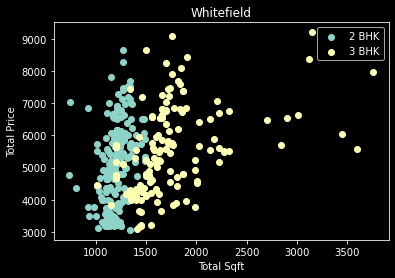

In [37]:
bhks_price_analysis(df1,"Whitefield")

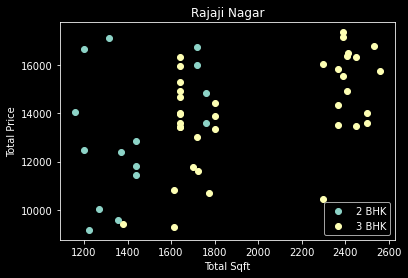

In [38]:
bhks_price_analysis(df1,"Rajaji Nagar")

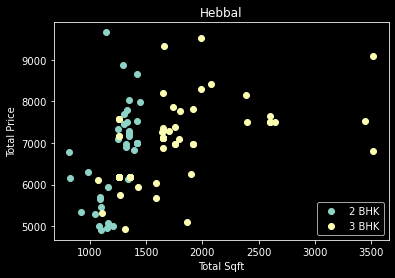

In [39]:
bhks_price_analysis(df1,"Hebbal")

### Removing outliers price_per_sqft and bedrooms:

In [40]:
def price_per_sqft_outlier_remover(df):
    eliminations=np.array([])
    for loc,loc_df in df.groupby('location'):
        bhk_stats=dict()
        for bhk,bhk_df in loc_df.groupby('size'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df['price_per_sqft']),
                'count':bhk_df.shape[0]
            }
        
        for bhk,bhk_df in loc_df.groupby('size'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                eliminations=np.append(eliminations,bhk_df[(bhk_df['price_per_sqft']<stats['mean'])].index.values)
                
    return df.drop(eliminations,axis=0)

In [41]:
df2=price_per_sqft_outlier_remover(df1)

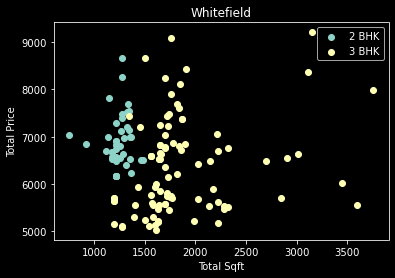

In [42]:
bhks_price_analysis(df2,"Whitefield")

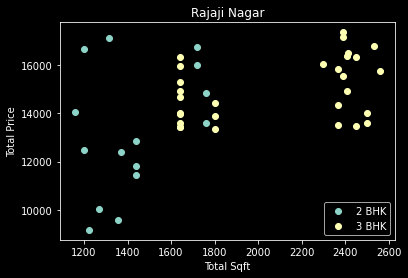

In [43]:
bhks_price_analysis(df2,"Rajaji Nagar")

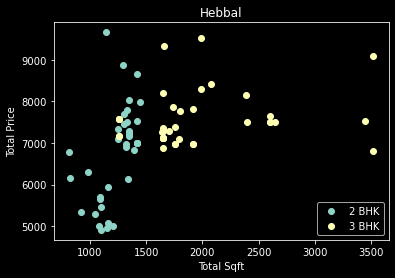

In [44]:
bhks_price_analysis(df2,"Hebbal")

In [45]:
df2.shape

(6803, 8)

### removing outliers on the basis of number of bathrooms:

In [46]:
df2[df2['bath']>df2['size']+2]

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
1489,Built-up Area,Chikkabanavar,4,2460.0,7.0,2.0,80.0,3252.032520
6261,Super built-up Area,Thanisandra,3,1806.0,6.0,2.0,116.0,6423.034330
7852,Super built-up Area,other,6,11338.0,9.0,1.0,1000.0,8819.897689


In [47]:
df2=df2[df2['bath']<=df2['size']+2]
df2.sample(5)

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
4857,Super built-up Area,Nagarbhavi,2,1225.0,2.0,3.0,58.00,4734.693878
1277,Plot Area,Brookefield,5,1950.0,6.0,3.0,175.00,8974.358974
9169,Super built-up Area,other,3,1260.0,2.0,2.0,85.05,6750.000000
4791,Super built-up Area,Mysore Road,2,1155.0,2.0,1.0,51.00,4415.584416
2709,Super built-up Area,Hegde Nagar,3,1703.0,3.0,2.0,113.00,6635.349383


In [48]:
df2.shape

(6800, 8)

In [49]:
df2=df2.drop('area_type',axis=1)
df2.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
1,Devarachikkanahalli,2,1250.0,2.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,2.0,65.0,4561.403509
5,Devarachikkanahalli,2,947.0,2.0,2.0,43.0,4540.654699


In [50]:
def strip_function(string):
    string=string.strip()
    return string

In [51]:
df2['location']=df2['location'].apply(strip_function)

In [52]:
df2.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
1,Devarachikkanahalli,2,1250.0,2.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,2.0,65.0,4561.403509
5,Devarachikkanahalli,2,947.0,2.0,2.0,43.0,4540.654699


In [53]:
df2.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
price_per_sqft    0
dtype: int64

### Using label encoder to replace locations:

In [54]:
le=LabelEncoder()

In [55]:
df2['loc']=le.fit_transform(df2['location'])
df2.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft,loc
1,Devarachikkanahalli,2,1250.0,2.0,2.0,40.0,3200.000000,69
2,Devarachikkanahalli,2,1200.0,2.0,2.0,83.0,6916.666667,69
3,Devarachikkanahalli,2,1170.0,2.0,2.0,40.0,3418.803419,69
4,Devarachikkanahalli,3,1425.0,2.0,2.0,65.0,4561.403509,69
5,Devarachikkanahalli,2,947.0,2.0,2.0,43.0,4540.654699,69


In [56]:
df2['location'].nunique()

238

In [57]:
df2['loc'].nunique()

238

In [58]:
le_converter=dict()

In [59]:
for location,subdf in df2.groupby('location'):
    if location not in le_converter.keys():
        dfx=subdf.iloc[0]
        dfx=dfx['loc']
        le_converter[location]=dfx

In [60]:
le_converter

{'1st Block Jayanagar': 0,
 '1st Phase JP Nagar': 1,
 '2nd Phase Judicial Layout': 2,
 '2nd Stage Nagarbhavi': 3,
 '5th Phase JP Nagar': 4,
 '6th Phase JP Nagar': 5,
 '7th Phase JP Nagar': 6,
 '8th Phase JP Nagar': 7,
 '9th Phase JP Nagar': 8,
 'AECS Layout': 9,
 'Abbigere': 10,
 'Akshaya Nagar': 11,
 'Ambalipura': 12,
 'Ambedkar Nagar': 13,
 'Amruthahalli': 14,
 'Anandapura': 15,
 'Ananth Nagar': 16,
 'Anekal': 17,
 'Anjanapura': 18,
 'Ardendale': 19,
 'Arekere': 20,
 'Attibele': 21,
 'BEML Layout': 22,
 'BTM 2nd Stage': 23,
 'BTM Layout': 24,
 'Babusapalaya': 25,
 'Badavala Nagar': 26,
 'Balagere': 27,
 'Banashankari': 28,
 'Banashankari Stage II': 29,
 'Banashankari Stage III': 30,
 'Banashankari Stage V': 31,
 'Banashankari Stage VI': 32,
 'Banaswadi': 33,
 'Banjara Layout': 34,
 'Bannerghatta': 35,
 'Bannerghatta Road': 36,
 'Basavangudi': 37,
 'Basaveshwara Nagar': 38,
 'Battarahalli': 39,
 'Begur': 40,
 'Begur Road': 41,
 'Bellandur': 42,
 'Benson Town': 43,
 'Bharathi Nagar': 4

### storing le_converter to .json file:

In [61]:
with open('variables/location.pkl','wb') as pickle_file:
    pickle.dump(le_converter,pickle_file)

## Diving the data into training data and testing data:

### removing unnecessary columns:

In [62]:
df3=df2.drop(['location','price_per_sqft'],axis=1)
df3.head()

,size,total_sqft,bath,balcony,price,loc
1,2,1250.0,2.0,2.0,40.0,69
2,2,1200.0,2.0,2.0,83.0,69
3,2,1170.0,2.0,2.0,40.0,69
4,3,1425.0,2.0,2.0,65.0,69
5,2,947.0,2.0,2.0,43.0,69


## Spliting training and testing data:

In [63]:
x=df3.drop(['price'],axis=1)
x

,size,total_sqft,bath,balcony,loc
1,2,1250.0,2.0,2.0,69
2,2,1200.0,2.0,2.0,69
3,2,1170.0,2.0,2.0,69
4,3,1425.0,2.0,2.0,69
5,2,947.0,2.0,2.0,69
...,...,...,...,...,...
9559,2,1155.0,2.0,1.0,237
9561,2,1200.0,2.0,3.0,237
9562,1,1800.0,1.0,1.0,237
9565,2,1353.0,2.0,2.0,237


In [64]:
y=df3['price']
y

1        40.0
2        83.0
3        40.0
4        65.0
5        43.0
        ...  
9559     64.0
9561     70.0
9562    200.0
9565    110.0
9566     26.0
Name: price, Length: 6800, dtype: float64

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [66]:
x_train.sample(5)

,size,total_sqft,bath,balcony,loc
8221,2,1340.0,2.0,3.0,237
4513,2,1236.0,2.0,1.0,158
2730,3,1168.0,2.0,1.0,96
72,2,812.0,2.0,1.0,4
5118,2,1050.0,2.0,2.0,189


In [67]:
x_test.sample(5)

,size,total_sqft,bath,balcony,loc
1535,2,1115.0,2.0,2.0,62
6091,2,900.0,2.0,0.0,213
1556,3,3815.0,3.0,1.0,65
7119,3,1457.0,2.0,2.0,231
4229,2,1100.0,2.0,2.0,146


In [68]:
y_train

2471    100.00
3631     39.00
951      37.80
3120     69.00
6638    230.00
         ...  
2557    180.00
4150     56.00
6651     67.30
6469     35.88
9521    285.00
Name: price, Length: 5440, dtype: float64

In [69]:
y_test[:5]

5128     52.1
4380     78.0
6634     58.0
4229     85.0
6260    115.0
Name: price, dtype: float64

## Using multivariate linear regression to build a prediction model:

In [70]:
model=LinearRegression()

In [71]:
model.fit(x_train,y_train)

LinearRegression()

In [72]:
model.score(x_test,y_test)

0.7109222886285214

## Storing the model in a pickle format:

In [73]:
with open('variables/model.pkl','wb') as pickle_file:
    pickle.dump(model,pickle_file)

In [74]:
with open('variables/training_data_input.pkl','wb') as pickle_file:
    pickle.dump(x_train,pickle_file)

In [75]:
with open('variables/training_data_output.pkl','wb') as pickle_file:
    pickle.dump(y_train,pickle_file)

In [76]:
with open('variables/testing_data_input.pkl','wb') as pickle_file:
    pickle.dump(x_test,pickle_file)

In [77]:
with open('variables/testing_data_output.pkl','wb') as pickle_file:
    pickle.dump(x_test,pickle_file)